In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
sys.path.append("../utils/")
import compete_banker
import date_util
import token_util
import pandas as pd

### 获取股东数在下降的股票

In [ ]:
date = "20190902"
stock = compete_banker.get_holder_declining(date, ready=False)

### 获取满足条件的成分股
* 流通股7亿以下，市值50亿以上

In [3]:
pro = token_util.set_token()

In [24]:
columns = ["stock_code", "name", "score"]
choose_list = pd.DataFrame(columns = columns)
    
for i in range(len(stock)):
    stock_code = stock["stock_code"][i]
    df = pro.daily_basic(ts_code=stock_code, trade_date='20180726', fields='ts_code,trade_date, float_share, total_mv')
    if len(df) != 0:
        if df["float_share"][0] < 7e4 and df["total_mv"][0] < 5e5 :
            list_tmp = pd.DataFrame([[stock_code, stock["name"][i], stock["score"][i]]], columns=columns)
            choose_list = choose_list.append(list_tmp)  

In [25]:
choose_list = choose_list.sort_values(by="score", ascending= False).reset_index(drop=True)

In [26]:
choose_list

,stock_code,name,score
0,002395.SZ,双象股份,0.979886
1,002878.SZ,元隆雅图,0.964915
2,603886.SH,元祖股份,0.933899
3,002379.SZ,宏创控股,0.929483
4,603286.SH,日盈电子,0.860919
5,000922.SZ,佳电股份,0.844850
6,603380.SH,易德龙,0.822792
7,603181.SH,皇马科技,0.786039
8,603129.SH,春风动力,0.778323
9,603226.SH,菲林格尔,0.777480


In [27]:
# choose_list.to_csv("./holder_num.csv", index=False)

### 获取每天可入场的股票

In [6]:
start_date = "20190901"
end_date = "20190930"
stock_list = []

date_range = date_util.get_work_day_range(start_date, end_date)

for date in date_range:
    stock = compete_banker.get_enter_stock(date)
    if stock != []:
        for sto in stock:
            stock_list.append(sto)

In [7]:
stock_list

['603129.SH',
 '603309.SH',
 '603669.SH',
 '600821.SH',
 '000032.SZ',
 '002806.SZ',
 '002777.SZ',
 '600821.SH',
 '000032.SZ',
 '600821.SH',
 '000032.SZ',
 '002248.SZ',
 '600378.SH',
 '002284.SZ',
 '603232.SH',
 '002211.SZ',
 '002211.SZ',
 '600523.SH',
 '002476.SZ',
 '002476.SZ',
 '603776.SH',
 '603999.SH',
 '603520.SH',
 '603197.SH',
 '603505.SH',
 '002189.SZ',
 '000909.SZ',
 '000909.SZ',
 '000909.SZ',
 '600378.SH',
 '000701.SZ',
 '603129.SH',
 '002096.SZ',
 '002362.SZ',
 '002777.SZ']

In [3]:
date = "20190912"
compete_banker.get_enter_stock(date)

['600523.SH', '002476.SZ']

### plot

In [3]:
pro = token_util.set_token()

In [44]:
ts_code = '002351.SZ'
df = pro.stk_holdernumber(ts_code=ts_code , start_date='20171021', end_date='20191108')

In [38]:
testdf = pro.top10_floatholders(ts_code=ts_code, start_date='20190101', end_date='20191231')

In [39]:
testdf

,ts_code,ann_date,end_date,holder_name,hold_amount
0,002119.SZ,20191025,20190930,宁波普利赛思电子有限公司,74009208.0
1,002119.SZ,20191025,20190930,宁波司麦司电子科技有限公司,31975507.0
2,002119.SZ,20191025,20190930,华润深国投信托有限公司-泽熙6期单一资金信托计划,18764272.0
3,002119.SZ,20191025,20190930,任伟达,14130542.0
4,002119.SZ,20191025,20190930,任颂柳,5720000.0
5,002119.SZ,20191025,20190930,中央汇金资产管理有限责任公司,4143230.0
6,002119.SZ,20191025,20190930,熊基凯,3729445.0
7,002119.SZ,20191025,20190930,郑康定,2593500.0
8,002119.SZ,20191025,20190930,中国银行股份有限公司-国泰CES半导体行业交易型开放式指数证券投资基金,1346168.0
9,002119.SZ,20191025,20190930,刘森,931298.0


In [40]:
print(testdf[:10]["hold_amount"].mean())

15734317.0


In [41]:
print(testdf[10:20]["hold_amount"].mean())

19839224.3


In [42]:
print(testdf[20:30]["hold_amount"].mean())

17155737.5


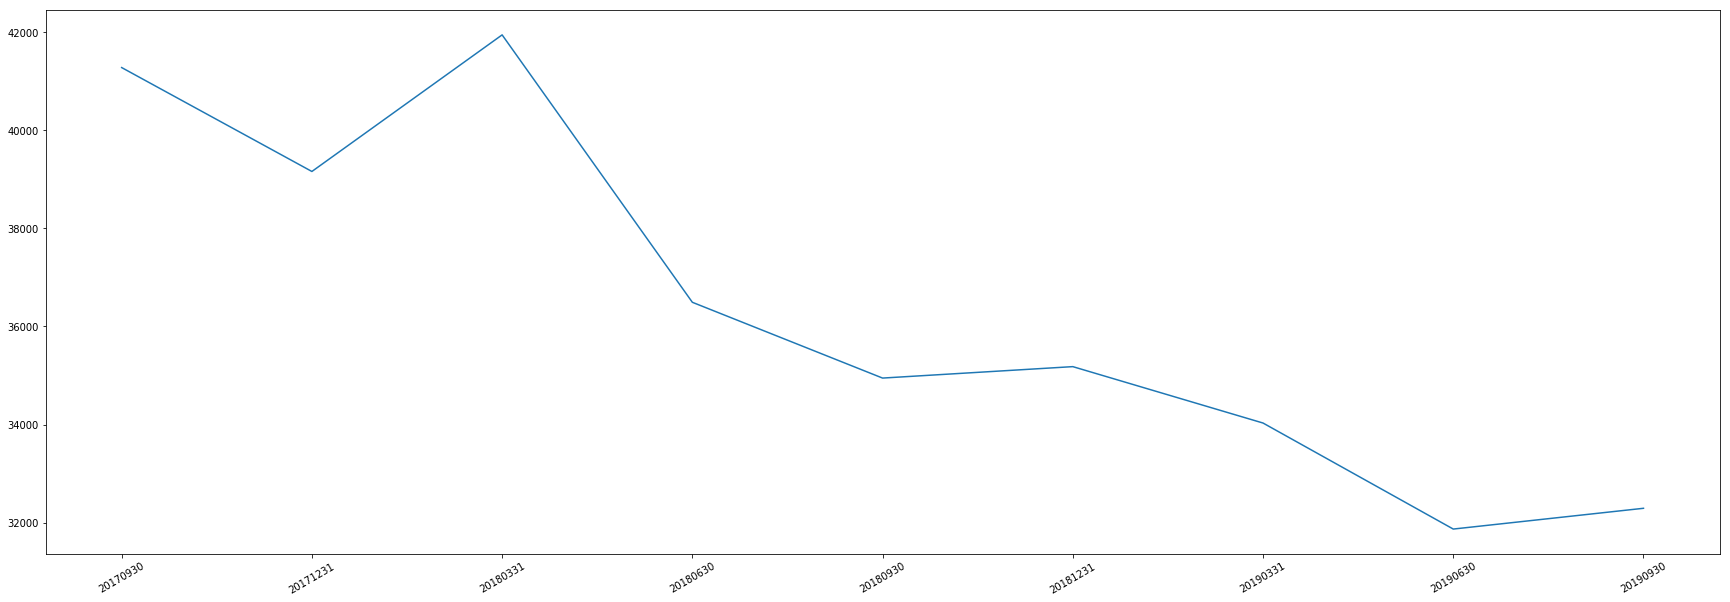

In [45]:
plt.figure(figsize=(30,10))
plt.plot(list(df["holder_num"])[::-1])
plt.xticks(range(len(df)), list(df["end_date"][::-1]) ,rotation=30)
plt.show()

In [17]:
df1 = pro.query('top10_floatholders', ts_code=ts_code, start_date='20170101', end_date='20191231')

In [18]:
end_date_list = []
hold_amount_list = []
for i in range(len(df1) // 10):
    end_date_list.append(df1['end_date'][i * 10])
    hold_amount_list.append(df1['hold_amount'][i*10:(i+1)*10].sum())

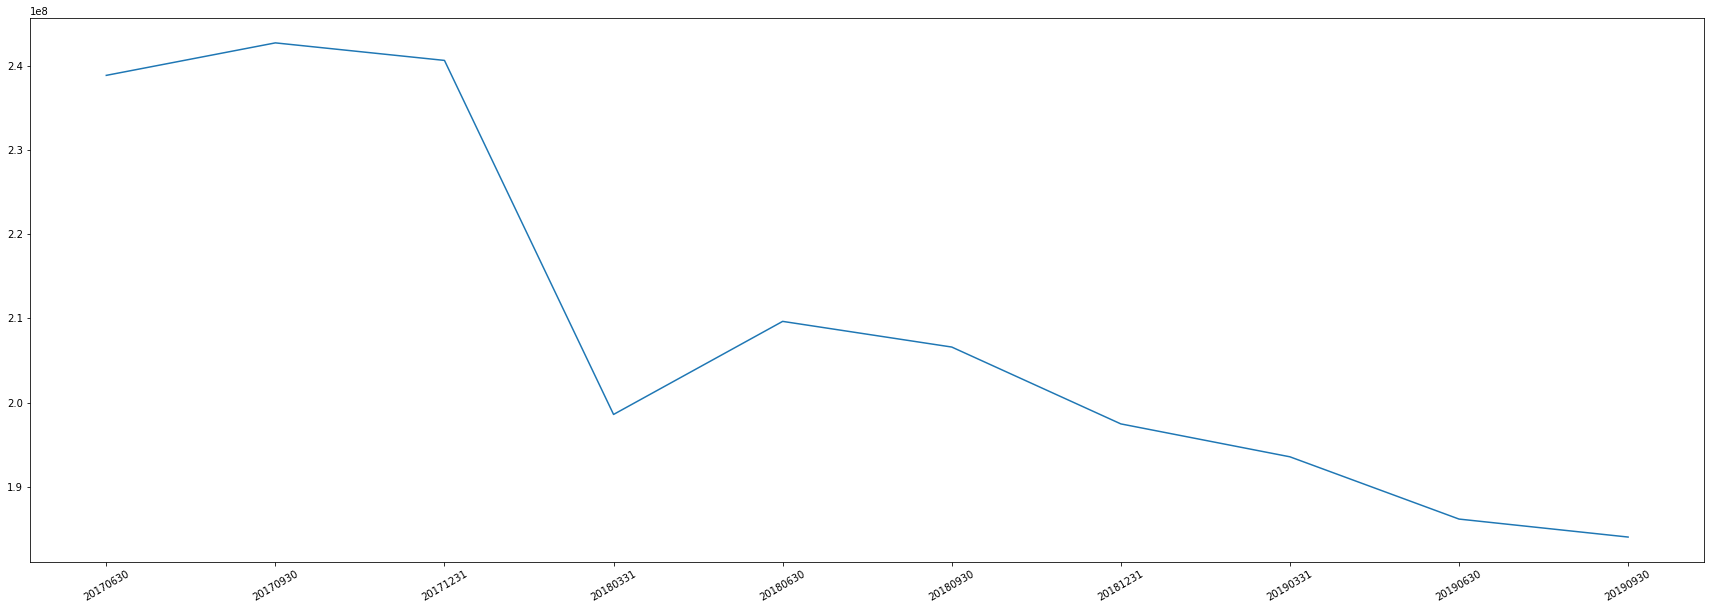

In [19]:
plt.figure(figsize=(30,10))
plt.plot(hold_amount_list[::-1])
plt.xticks(range(len(end_date_list)), end_date_list[::-1], rotation=30)
plt.show()